# Fire Weather Index (FWI)
#### The aim of this assignment is to process and clean the dataset, generate visualizations, and derive insights from the Algerian forest fire dataset by analyzing the Fire Weather Index (FWI)

In [719]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso,  ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [720]:
# Load the Fire weather dataset
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [721]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [722]:
# show summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [723]:
# The Column Classes is not numerical also it contains extra blank spaces that needs to be removed

df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [724]:
# Removing blank spaces  from the Classes column
import re

# Using str.strip() to eliminate blank spaces before and after the words
# Also str.replace() to replace multiple spaces  with a single space using a regular expression

df['Classes'] = df['Classes'].str.strip().str.replace(r'\s+', ' ', regex=True) 


In [725]:
# Verify the replacement

df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [726]:
# this data do not have null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [727]:
# Descriptive statistic to check the distribution of the data
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [728]:
# Using One-Hot Encoding for the 'Classes' column to  convert categorical data into numerical data
df_encoded = pd.get_dummies(df, columns=['Classes'], drop_first=True)

df_new=df_encoded

df_new

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,True
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,True
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,True
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,True
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,False
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,True
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,True
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,True


In [729]:
# Removing year column because there is no variation in the data, all records are from 2012
df_new = df_new.drop(columns=['year'])

In [730]:
print(df_new['Region'].unique())

[0 1]


In [731]:
df_new.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_not fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,True
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,True
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,True
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,True
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,True


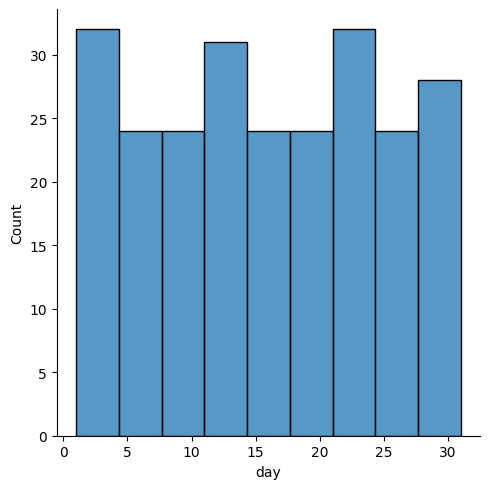

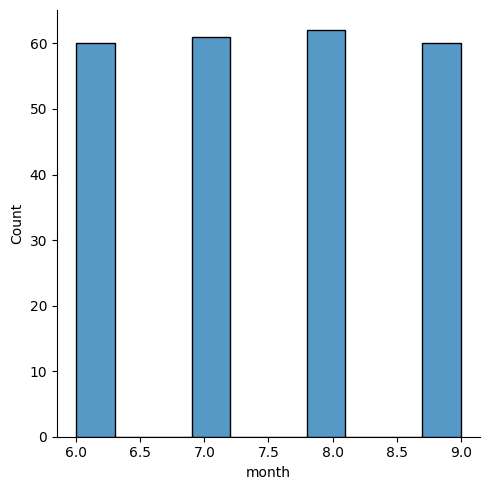

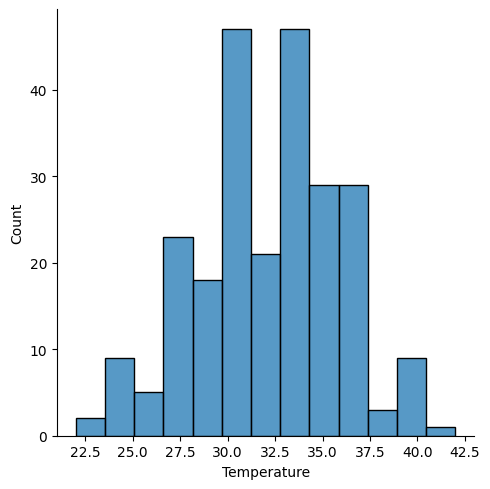

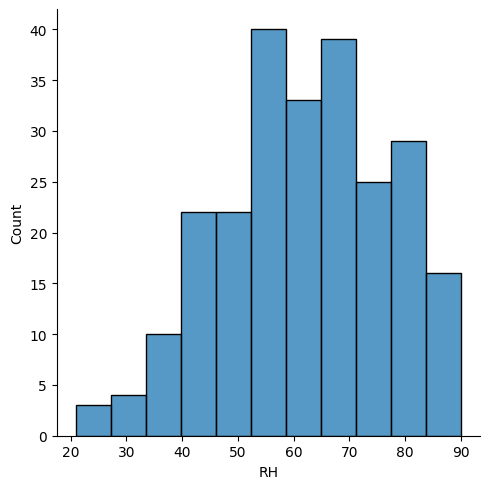

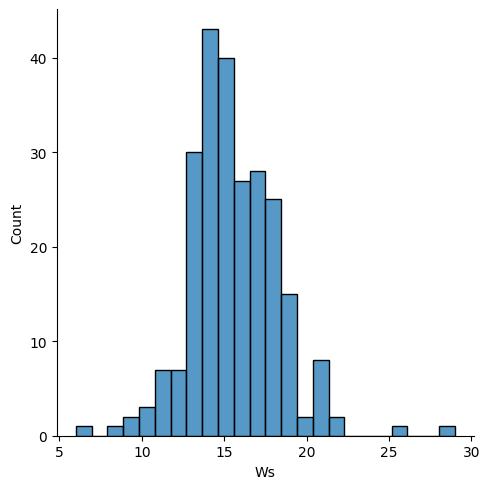

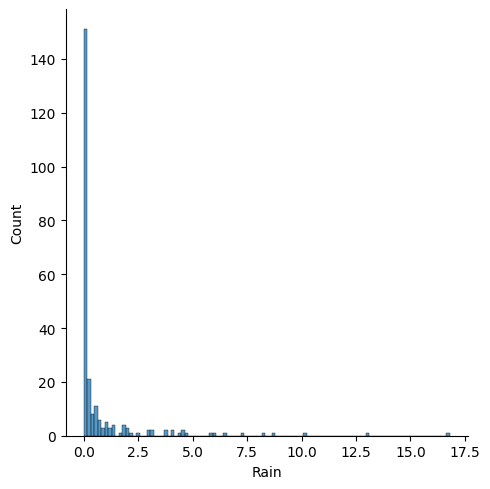

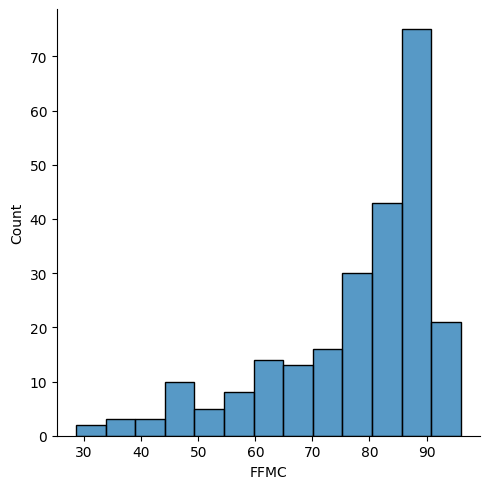

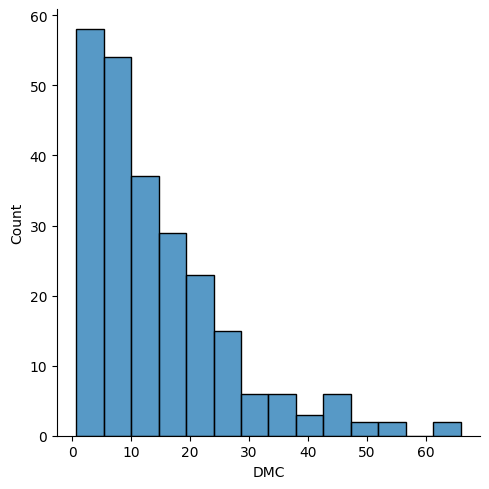

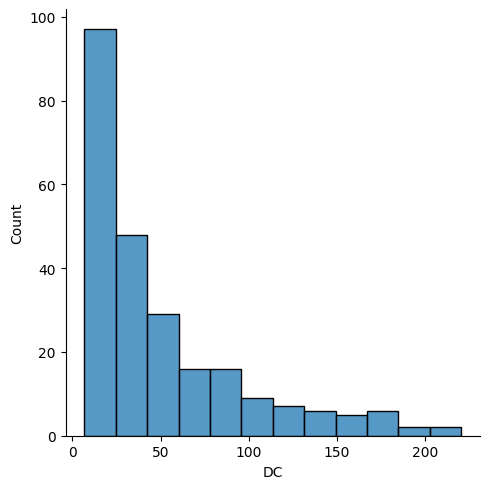

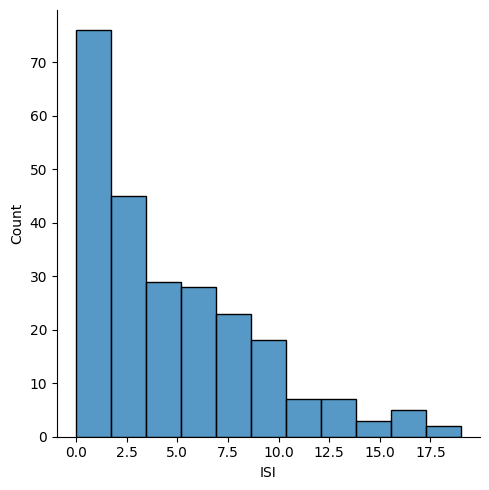

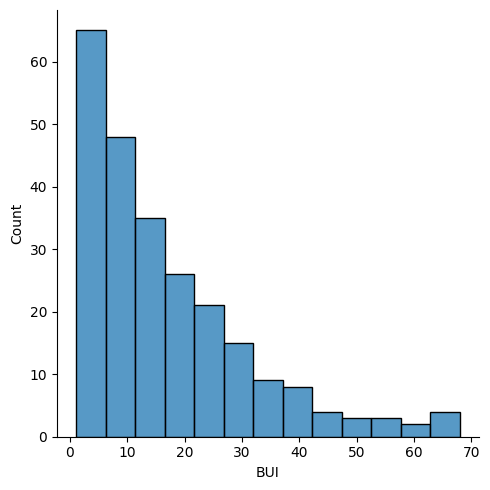

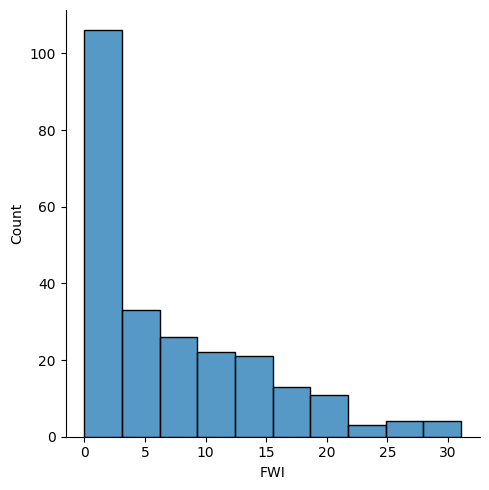

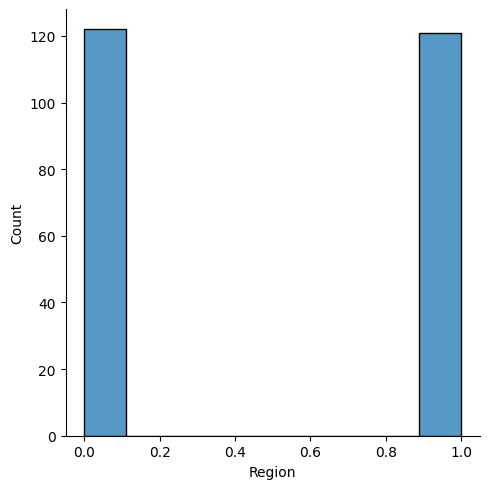

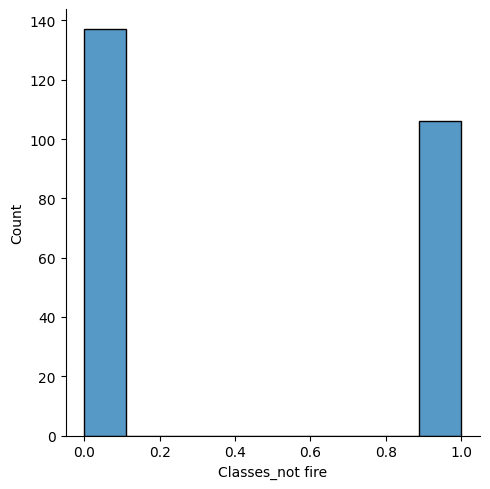

In [732]:
# univariable analysis
for col in df_new.columns:
    sns.displot(df_new[col])
    plt.show


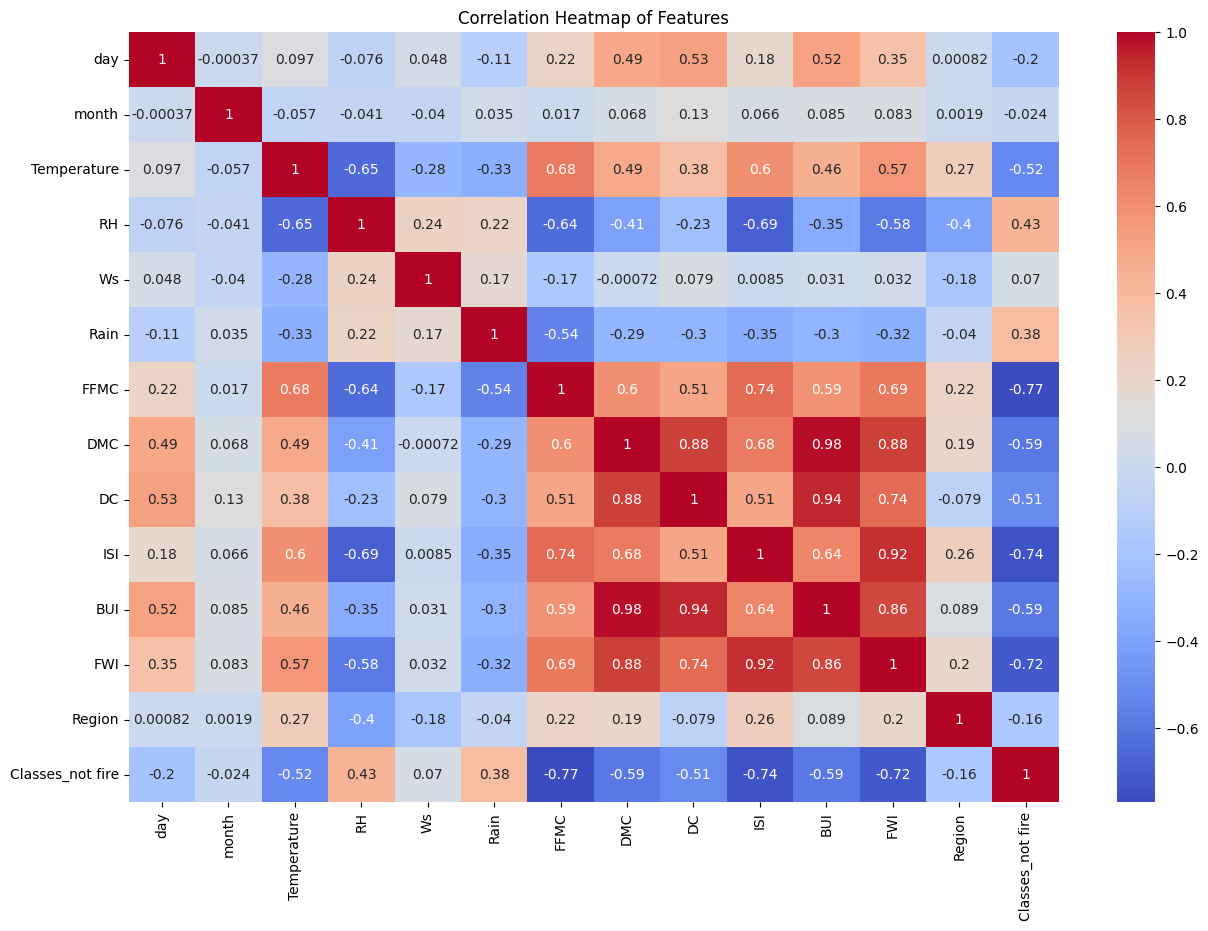

In [733]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [734]:
# split the data into dependent and independent variables
#  DMC and DC are not considered because are redundant with BUI variable
x=df_new.drop(['FWI','DMC','DC'], axis=1)
y=df['FWI']

In [735]:
df_new.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire'],
      dtype='object')

In [736]:
# split the input data & target into train & test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [737]:
# # Scale the data
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

### Build the model
#### Build Linear Regression Model evaluating the model using R2_score,MAE,MSE,RMSE
#### Using Regularization tecniques Ridge, Lasso and ElasticNet to improve model performance

In [738]:
# intiate the object_names for models

lr=LinearRegression() # Linear Regression
rd=Ridge()            # Ridge
ls=Lasso()            # Lasso
en=ElasticNet()       # ElasticNet


In [739]:
# train the model
print("Performance Metrics of Linear Regression Model")
print()
lr.fit(x_train_sc, y_train)
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)
y_pred_tr=lr.predict(x_train_sc) # prediction on train_data
y_pred_ts=lr.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

print()
print("="*150)


print("Performance Metrics of Ridge Regression Model")
print()
rd.fit(x_train_sc, y_train)
print("coefficients", rd.coef_)
print("intercept", rd.intercept_)
y_pred_tr=rd.predict(x_train_sc) # prediction on train_data
y_pred_ts=rd.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of Lasso Regression Model")
print()
ls.fit(x_train_sc, y_train)
print("coefficients", ls.coef_)
print("intercept", ls.intercept_)
y_pred_tr=ls.predict(x_train_sc) # prediction on train_data
y_pred_ts=ls.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of ElasticNet Regression Model")
print()
en.fit(x_train_sc, y_train)
print("coefficients", en.coef_)
print("intercept", en.intercept_)
y_pred_tr=en.predict(x_train_sc) # prediction on train_data
y_pred_ts=en.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

Performance Metrics of Linear Regression Model

coefficients [ 0.06885917  0.00658602 -0.07210544 -0.20427341 -0.11858689  0.03008384
 -0.89929227  5.20265265  3.69478967 -0.07381856 -0.25615926]
intercept 7.420103092783506


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
r2_score 0.9732995641492419
mean_absolute_error 0.6732395006025548
mean_squared_error 1.6199335550361373
root_mean_squared_error 1.2727661038211764

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
r2_score 0.9882093778385607
mean_absolute_error 0.43380219324500785
mean_squared_error 0.35735514611056546
root_mean_squared_error 0.5977918919745947

Performance Metrics of Ridge Regression Model

coefficients [ 0.07818757  0.0154127  -0.06186711 -0.23715049 -0.09748369  0.02868066
 -0.86288634  5.104335

#### Adding hyperparameter Alpha = 0.01 to Ridge, Lasso and ElasticNet Regularization to tuning the model

In [740]:
# intiate the object_names for models applying hyperparameter alpha
rd=Ridge(alpha=0.01)
ls=Lasso(alpha=0.01)
en=ElasticNet(alpha=0.01)

In [741]:
print()
print("="*150)
print("Performance Metrics of Ridge Regression Model Alpha = 0.01")
print()
rd.fit(x_train_sc, y_train)
print("coefficients", rd.coef_)
print("intercept", rd.intercept_)
y_pred_tr=rd.predict(x_train_sc) # prediction on train_data
y_pred_ts=rd.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of Lasso Regression Model Alpha = 0.01")
print()
ls.fit(x_train_sc, y_train)
print("coefficients", ls.coef_)
print("intercept", ls.intercept_)
y_pred_tr=ls.predict(x_train_sc) # prediction on train_data
y_pred_ts=ls.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of ElasticNet Regression Model Alpha = 0.01")
print()
en.fit(x_train_sc, y_train)
print("coefficients", en.coef_)
print("intercept", en.intercept_)
y_pred_tr=en.predict(x_train_sc) # prediction on train_data
y_pred_ts=en.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


Performance Metrics of Ridge Regression Model Alpha = 0.01

coefficients [ 0.06895241  0.00667644 -0.07200266 -0.20461685 -0.11836968  0.03006904
 -0.89892429  5.20163957  3.69458116 -0.07378182 -0.25650118]
intercept 7.420103092783506


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
r2_score 0.9732995588459288
mean_absolute_error 0.6733445912529143
mean_squared_error 1.6199338767917433
root_mean_squared_error 1.2727662302213016

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
r2_score 0.9882067077806983
mean_absolute_error 0.433836524113281
mean_squared_error 0.357436071349661
root_mean_squared_error 0.5978595749418596

Performance Metrics of Lasso Regression Model Alpha = 0.01

coefficients [ 6.14393085e-02  2.83883367e-03 -4.15577667e-02 -1.60408670e-01
 -9.3384

#### Polynomial Regression

In [742]:
# Transform the original features to include polynomial terms
poly = PolynomialFeatures(degree=1,include_bias=False)         # max degree of the polynomial feature
x_plr_tr = poly.fit_transform(x_train_sc)   # Convert the original feature to polynomial feature

x_plr_ts = poly.transform(x_test)           # Transform data to polynomial features.

In [743]:
print("="*150)
print("Performance Metrics of Polynomial Regression Model")

# Fit the polynomial regression model
lrpoly = LinearRegression()
lrpoly.fit(x_plr_tr, y_train)

print("coefficients", lrpoly.coef_)
print("intercept", lrpoly.intercept_)

y_poly_pred_tr=lrpoly.predict(x_plr_tr) # prediction on train_data
y_poly_pred_ts=lrpoly.predict(x_plr_ts) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_poly_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_poly_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_poly_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_poly_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_poly_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_poly_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_poly_pred_ts)))

Performance Metrics of Polynomial Regression Model
coefficients [ 0.06885917  0.00658602 -0.07210544 -0.20427341 -0.11858689  0.03008384
 -0.89929227  5.20265265  3.69478967 -0.07381856 -0.25615926]
intercept 7.420103092783506


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
r2_score 0.9732225152348014
mean_absolute_error 0.6732395006025541
mean_squared_error 1.6199335550361371
root_mean_squared_error 1.2727661038211762

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
r2_score -47.48570633266912
mean_absolute_error 31.80906007639723
mean_squared_error 1469.5252238215846
root_mean_squared_error 38.33438696290296


#### Using Regularization to improve the Polynomial Regression Model to reduce Overfitting

In [744]:
# intiate the object_names for models applying hyperparameter alpha
rd_plr=Ridge(alpha=1.0)
ls_plr=Lasso(alpha=1.0)
en_plr=ElasticNet(alpha=1.0)

In [745]:
print("="*150)
print("Performance Metrics of Polynomial Regression Model Improving")
print("="*150)

print("Performance Metrics of Ridge Regression Model Alpha=1.0")
print()
rd_plr.fit(x_plr_tr, y_train)
print("coefficients", rd_plr.coef_)
print("intercept", rd_plr.intercept_)
y_pred_tr=rd_plr.predict(x_plr_tr) # prediction on train_data
y_pred_ts=rd_plr.predict(x_plr_ts) # prediction on test_data

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of Lasso Regression Model alpha=1.0")
print()
ls_plr.fit(x_plr_tr, y_train)
print("coefficients", ls_plr.coef_)
print("intercept", ls_plr.intercept_)
y_pred_tr=ls_plr.predict(x_plr_tr) # prediction on train_data
y_pred_ts=ls_plr.predict(x_plr_ts) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))


print()
print("="*150)


print("Performance Metrics of ElasticNet Regression Model alpha=1.0")
print()
en_plr.fit(x_plr_tr, y_train)
print("coefficients", en_plr.coef_)
print("intercept", en_plr.intercept_)
y_pred_tr=en_plr.predict(x_plr_tr) # prediction on train_data
y_pred_ts=en_plr.predict(x_plr_ts) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

Performance Metrics of Polynomial Regression Model Improving
Performance Metrics of Ridge Regression Model Alpha=1.0

coefficients [ 0.07818757  0.0154127  -0.06186711 -0.23715049 -0.09748369  0.02868066
 -0.86288634  5.10433578  3.67372862 -0.0701847  -0.28908407]
intercept 7.420103092783506

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
r2_score 0.9732489754443454
mean_absolute_error 0.6837980897800774
mean_squared_error 1.6230028060785482
root_mean_squared_error 1.2739712736473097

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
r2_score -47.1763561311436
mean_absolute_error 31.695617187736293
mean_squared_error 1460.1493075254093
root_mean_squared_error 38.21190007740271

Performance Metrics of Lasso Regression Model alpha=1.0

coefficients [ 0.          0.    

### Cross-validation and hyperparameter tuning to evaluate the model's performance

In [746]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for each model

# Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False]
}
#Ridge
param_grid_rd = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

#Lasso
param_grid_ls = {
    'alpha': [0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 5000]
}

# Elastic Net
param_grid_en = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}



In [747]:
# Cross-validation and hyperparameter tuning for Multiple Linear Regression model

print("="*150)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5) # Initialize GridSearchCV
grid_search_lr.fit(x_train_sc, y_train)                # Fit the grid search
print('Best Parameters for Linear Regression:', grid_search_lr.best_params_)
print('Best Score:', grid_search_lr.best_score_)

Best Parameters for Linear Regression: {'fit_intercept': True}
Best Score: 0.9540695695901402


In [748]:
# Cross-validation and hyperparameter tuning for Ridge model

grid_search_rd = GridSearchCV(rd, param_grid_rd, cv=5) # Initialize GridSearchCV
grid_search_rd.fit(x_train_sc, y_train)                # Fit the grid search
print('Best Parameters Ridge:', grid_search_rd.best_params_)
print('Best Score:', grid_search_rd.best_score_)

Best Parameters Ridge: {'alpha': 1, 'solver': 'saga'}
Best Score: 0.9549761166061241


In [749]:
# Cross-validation and hyperparameter tuning for Lasso Model

grid_search_ls = GridSearchCV(ls, param_grid_ls, cv=5) # Initialize GridSearchCV
grid_search_ls.fit(x_train_sc, y_train)                # Fit the grid search
print('Best Parameters for Lasso:', grid_search_ls.best_params_)
print('Best Score:', grid_search_ls.best_score_)

Best Parameters for Lasso: {'alpha': 0.1, 'max_iter': 1000}
Best Score: 0.9557710382391121


In [750]:
# Cross-validation and hyperparameter tuning for ElasticNet Model

grid_search_en = GridSearchCV(en, param_grid_en, cv=5) # Initialize GridSearchCV
grid_search_en.fit(x_train_sc, y_train)                # Fit the grid search
print('Best Parameters for ElasticNet:', grid_search_en.best_params_)
print('Best Score:', grid_search_en.best_score_)

Best Parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.9}
Best Score: 0.9558560721273016


#### Evaluate the Best Model

In [751]:

print()
print("="*150)

# For Linear Regression
best_lr = grid_search_lr.best_estimator_
lr_score = best_lr.score(x_test_sc, y_test)
print("Test score for Linear Regression:", lr_score)

# For Ridge
best_rd = grid_search_rd.best_estimator_
rd_score = best_rd.score(x_test_sc, y_test)
print("Test score for Ridge:", rd_score)

# For Lasso
best_ls = grid_search_ls.best_estimator_
ls_score = best_ls.score(x_test_sc, y_test)
print("Test score for Lasso:", ls_score)

# For ElasticNet
best_en = grid_search_en.best_estimator_
en_score = best_en.score(x_test_sc, y_test)
print("Test score for ElasticNet:", en_score)




Test score for Linear Regression: 0.9882093778385607
Test score for Ridge: 0.9878425178921897
Test score for Lasso: 0.9851029435762303
Test score for ElasticNet: 0.9836662675456138


####  Evaluating The Best Model

In [752]:
print()
print("="*150)
print("Performance Metrics on Best Linear Regression Model ")
print()
best_lr.fit(x_train_sc, y_train)        # Train the best model on the entire training set
print("coefficients", best_lr.coef_)
print("intercept", best_lr.intercept_)
y_pred_tr=best_lr.predict(x_train_sc)   # prediction on train_data
y_pred_ts=best_lr.predict(x_test_sc)    # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))




Performance Metrics on Best Linear Regression Model 

coefficients [ 0.06885917  0.00658602 -0.07210544 -0.20427341 -0.11858689  0.03008384
 -0.89929227  5.20265265  3.69478967 -0.07381856 -0.25615926]
intercept 7.420103092783506


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
r2_score 0.9732995641492419
mean_absolute_error 0.6732395006025548
mean_squared_error 1.6199335550361373
root_mean_squared_error 1.2727661038211764

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
r2_score 0.9882093778385607
mean_absolute_error 0.43380219324500785
mean_squared_error 0.35735514611056546
root_mean_squared_error 0.5977918919745947


#### Saving the model

In [753]:
import pickle

pickle.dump(scaler, open('FWI_scaler.pkl', 'wb'))
pickle.dump(best_lr, open('FWI_model.pkl', 'wb'))